## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [ ]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Classificação**

## **Coleta de dados**


In [ ]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [ ]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [ ]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [ ]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [ ]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## **Importância de Atributos**

In [ ]:
dt.feature_importances_

array([0.24750773, 0.0432777 , 0.05214257, 0.        , 0.05018218,
       0.60688982, 0.        , 0.        ])

## **LIME**

In [ ]:
!pip install lime

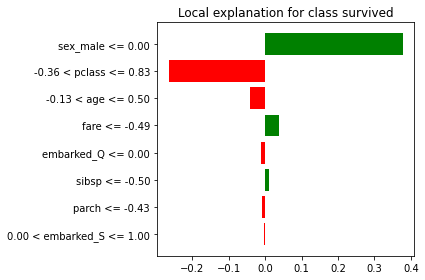

In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=["died", "survived"],
)
exp = explainer.explain_instance(
    X_train.iloc[-1].values, dt.predict_proba
)

fig = exp.as_pyplot_figure()
fig.tight_layout()

## **Interpretação de Árvores (Treeinterpreter)**

In [ ]:
!pip install treeinterpreter

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf5 = RandomForestClassifier(max_features=0.4, min_samples_leaf=1, n_estimators=200, random_state=42)
rf5.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, n_estimators=200, random_state=42)

In [ ]:
from treeinterpreter import treeinterpreter as ti
instances = X.iloc[:3] #duas primeiras linhas (amostra)
prediction, bias, contribs = ti.predict(rf5, instances)
i = 0 # dados da primeira linha
print('Instances', i)
print('Prediction', prediction[i])
print('Bias (trainset mean)', bias[i])
print('Feature contributions:')
for c, feature in zip(
    contribs[i], instances.columns
):
  print(f'   {feature}   {c}')

#atributos mais importantes : sex_male, age e fare (preço da passagem)

Instances 0
Prediction [0.92491667 0.07508333]
Bias (trainset mean) [0.63887555 0.36112445]
Feature contributions:
   pclass   [ 0.02850946 -0.02850946]
   age   [ 0.05355825 -0.05355825]
   sibsp   [ 0.00167318 -0.00167318]
   parch   [ 0.00942237 -0.00942237]
   fare   [ 0.04707442 -0.04707442]
   sex_male   [ 0.13585812 -0.13585812]
   embarked_Q   [-0.00061189  0.00061189]
   embarked_S   [ 0.0105572 -0.0105572]


## **Gráfico de dependencia visual**

In [ ]:
!pip install pdpbox

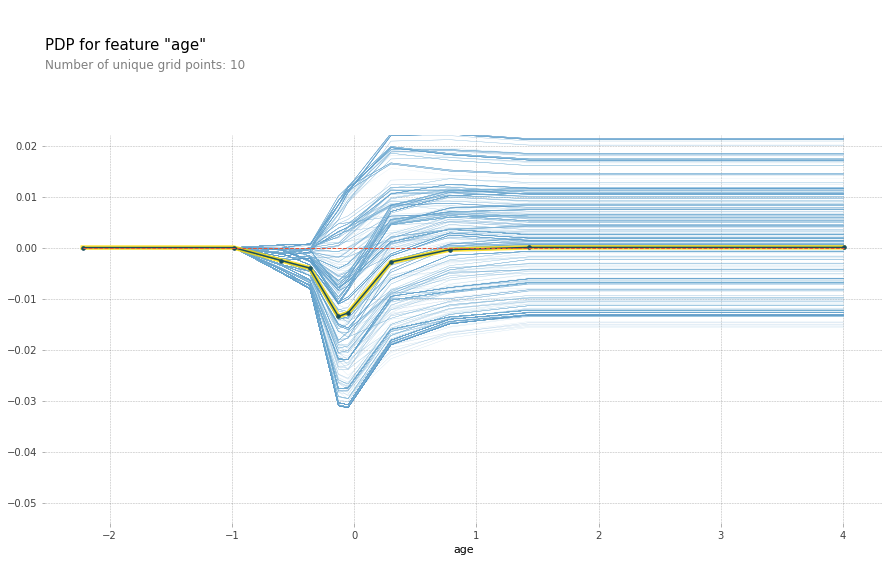

In [ ]:
from pdpbox import pdp
rf6 = RandomForestClassifier(max_features='auto', min_samples_leaf=0.1, n_estimators=200, random_state=42)
rf6.fit(X_train, y_train)
feat_name = 'age'
p = pdp.pdp_isolate(
    rf6, X, X.columns, feat_name
)

fig, _ = pdp.pdp_plot(
    p, feat_name, plot_lines=True
)

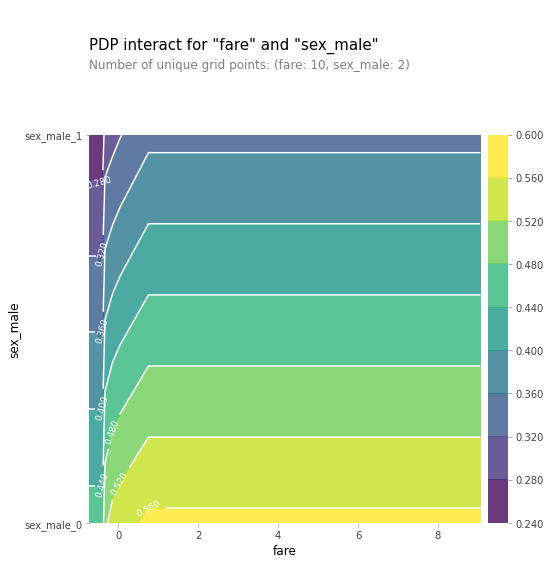

In [ ]:
features = ['fare','sex_male']
p = pdp.pdp_interact(
    rf6, X, X.columns, features
)
fig, _ = pdp.pdp_interact_plot(
    p, features
)

## **Modelos Substitutos**

In [ ]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)

sur_dt = DecisionTreeClassifier()
sur_dt.fit(X_test, sv.predict(X_test))
for col, val in sorted(
    zip(
        X_test.columns,
        sur_dt.feature_importances_ 
    ),
    key = lambda x: x[1],
    reverse=True
)[:7]:
  print(f'{col:10}{val:10.3f}')

sex_male       0.695
sibsp          0.083
age            0.072
embarked_S     0.049
pclass         0.047
fare           0.032
embarked_Q     0.014


## **Shapley**

In [20]:
#!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.7 MB/s eta 0:00:00


In [ ]:
rf6.predict_proba(X_test.iloc[[20]]) # a linha 20 previu que o individuo faleceu

array([[0.59358954, 0.40641046]])

Detalhando a contribuição dos atributos.
Indice 1 porque queremos que o lado direito do gráfico seja a sobrivência
. Quanto maior o atributo mais impacto ele causará

In [ ]:
X_test.iloc[[20]]

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
20,0.825248,-0.51752,-0.498616,-0.432553,-0.451344,0.0,0,1


In [ ]:
import shap
shap.initjs()
s = shap.TreeExplainer(rf6)
shap_vals = s.shap_values(X_test)
target_idx = 1
shap.force_plot(
    s.expected_value[target_idx],
    shap_vals[target_idx][20, :],
    feature_names=X_test.columns
)

In [ ]:
shap.initjs()
shap.force_plot(
    s.expected_value[1],
    shap_vals[1],
    feature_names=X_test.columns
)

Os mais jovens e os mais velhos tem uma taxa maior de sobrevivencia. A medida que a idade aumenta, um pclass menor tem mais chance de sobrevivencia

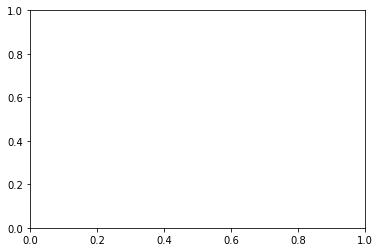

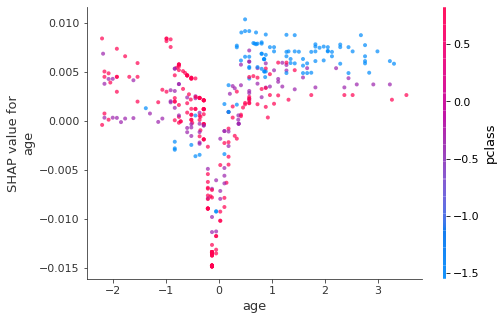

In [ ]:
fig_ax = plt.subplots(figsize=(6,4))
res = shap.dependence_plot(
    'age',
    shap_vals[target_idx],
    X_test,
    feature_names=X_test.columns,
    alpha=0.7
)

Pontuação baixa de sex_male (feminino) pressiona em direção a sobrevivencia. O atributo age é um pouco mais difícil de ser interpretado, porque valores baixos e altos tendem a sobrevivência e medianos tende ao falecimento.

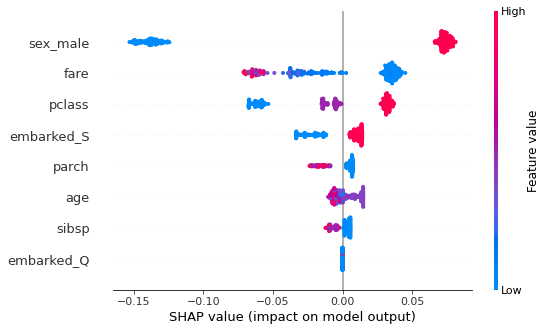

In [ ]:
fig_ax = plt.subplots(figsize=(6,4))
res = shap.summary_plot(
    shap_vals[0],
    X_test
)

# **Regressão**

## **Coleta de dados**


In [7]:
b = load_boston()

In [8]:
bos_X = pd.DataFrame(b.data, columns=b.feature_names)
bos_y = b.target

In [9]:
df = pd.concat([bos_X, pd.DataFrame(bos_y, columns=['target'])], axis=1)

In [10]:
bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
from sklearn.model_selection import train_test_split
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [12]:
sd = preprocessing.StandardScaler()
bos_sX = sd.fit_transform(bos_X)
bos_sX = pd.DataFrame(bos_sX, columns=bos_X.columns)

In [13]:
from sklearn.model_selection import train_test_split
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
xgr = xgb.XGBRegressor(
    random_state = 42,
    base_score = 0.5
)
xgr.fit(bos_X_train, bos_y_train)

In [19]:
sample_idx = 5
print('Previsão:', xgr.predict(bos_X.iloc[[sample_idx]]))
print('Real:', bos_y[sample_idx])

Previsão: [27.269186]
Real: 28.7


## **Shapley**

Previsão base é 23. O valor é empurrado de 23 para 27 em virtudes de atributos.

Status da população (LSTAT) e a taxa de imposto da propriedade (TAX) empurram o preço para cima, enquanto o número de comodos (RM) empurra para baixo.

In [21]:
import shap
shap.initjs()
exp = shap.TreeExplainer(xgr)
shap_vals = exp.shap_values(bos_X)
shap.force_plot(
    exp.expected_value,
    shap_vals[sample_idx],
    bos_X.iloc[sample_idx]
)

In [22]:
shap.initjs()
shap.force_plot(
    exp.expected_value,
    shap_vals,
    bos_X
)

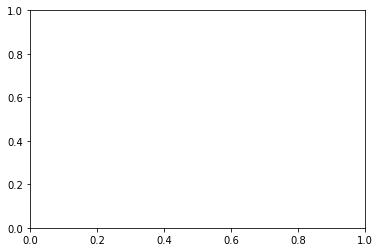

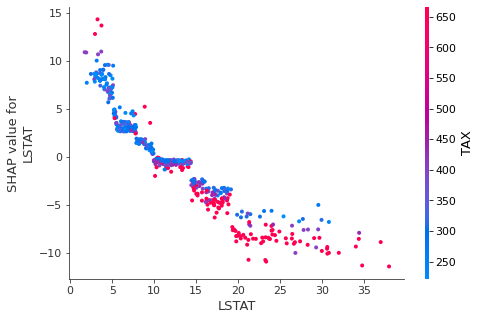

In [24]:
fig_ax = plt.subplots(figsize=(6,4))
res = shap.dependence_plot(
    'LSTAT',
    shap_vals,
    bos_X
)

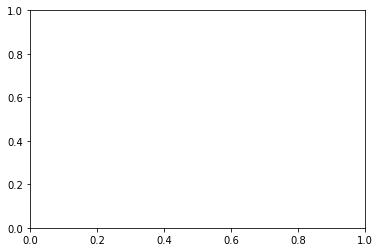

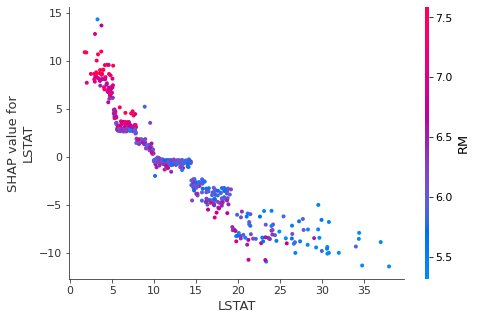

In [25]:
fig_ax = plt.subplots(figsize=(6,4))
res = shap.dependence_plot(
    'LSTAT',
    shap_vals,
    bos_X,
    interaction_index='RM'
)

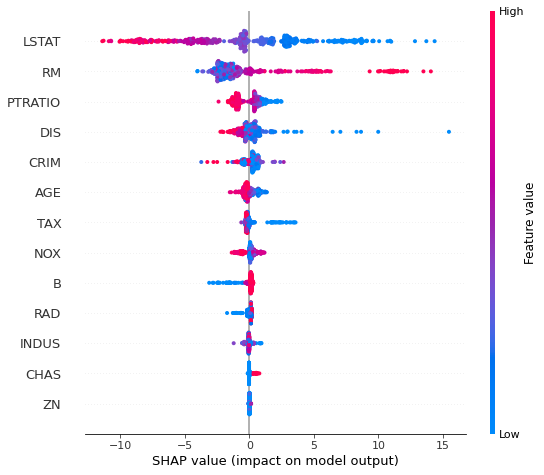

In [26]:
fig_ax = plt.subplots(figsize=(6,4))
res = shap.summary_plot(
    shap_vals,
    bos_X
)